# t-sne

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

In [ ]:
X.shape

(500, 64)

In [ ]:
pd.Series(y).value_counts()

3    53
1    52
6    51
0    51
7    50
5    50
2    50
4    49
9    48
8    46
dtype: int64

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [ ]:
X_2d = tsne.fit_transform(X)

In [ ]:
mydata=pd.DataFrame(X_2d,columns=['X1','X2'])

In [ ]:
mydata

,X1,X2
0,21.128862,-27.168310
1,4.987787,19.583260
2,-2.877124,15.290366
3,-8.521600,-21.091736
4,15.439630,23.603703
...,...,...
495,-11.408027,-5.706061
496,12.562231,22.834518
497,12.427700,21.450829
498,-16.493898,10.183492


In [ ]:
mydata['digits']=y

In [ ]:
mydata

,X1,X2,digits
0,21.128862,-27.168310,0
1,4.987787,19.583260,1
2,-2.877124,15.290366,2
3,-8.521600,-21.091736,3
4,15.439630,23.603703,4
...,...,...,...
495,-11.408027,-5.706061,5
496,12.562231,22.834518,4
497,12.427700,21.450829,4
498,-16.493898,10.183492,7


In [ ]:
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


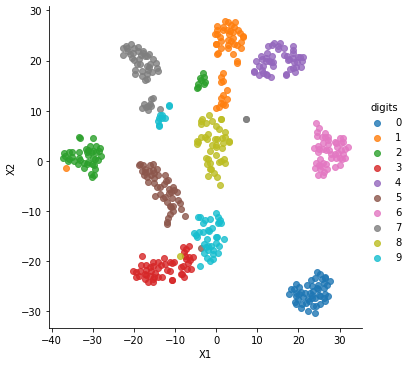

In [ ]:
sns.lmplot('X1','X2',hue='digits',data=mydata,fit_reg=False)

# tsne on wine data

In [ ]:
wine=pd.read_csv(r'/Users/lalitsachan/Dropbox/0.0 Data/winequality-white.csv',sep=";")

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
X=scale(wine.iloc[:,:-1])

In [ ]:
X_2d=tsne.fit_transform(X)

In [ ]:
mydata=pd.DataFrame(X_2d,columns=['X','Y'])

In [ ]:
mydata['quality']=wine['quality']

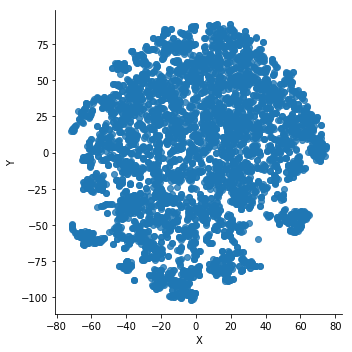

In [ ]:
sns.lmplot('X','Y',data=mydata,fit_reg=False)

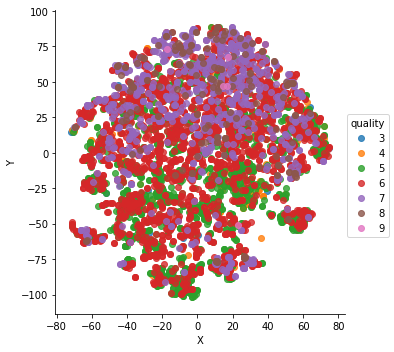

In [ ]:
sns.lmplot('X','Y',hue='quality',data=mydata,fit_reg=False)

In [ ]:
mydata['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

# PCA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
file=r'Existing_Base.csv'

In [ ]:
bd=pd.read_csv(file)

In [ ]:
bd.dtypes

REF_NO                               int64
children                            object
age_band                            object
status                              object
occupation                          object
occupation_partner                  object
home_status                         object
family_income                       object
self_employed                       object
self_employed_partner               object
year_last_moved                      int64
TVarea                              object
post_code                           object
post_area                           object
Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan  

In [ ]:
bd=bd[['Average Credit Card Transaction', 'Balance Transfer',
       'Term Deposit', 'Life Insurance', 'Medical Insurance',
       'Average A/C Balance', 'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
        'Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative',
       'Portfolio Balance']]

In [ ]:
bd.shape

(10155, 15)

In [ ]:
bd.corr()

,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
Average Credit Card Transaction,1.000000,0.123855,0.323462,0.145041,0.405090,0.172240,0.087289,0.150667,0.133126,0.087695,0.132518,0.497025,0.205289,0.228141,0.335674
Balance Transfer,0.123855,1.000000,0.229457,0.564538,0.162085,0.358938,0.351499,0.454602,0.166496,0.153097,0.112012,0.739791,0.463556,0.581039,0.639400
Term Deposit,0.323462,0.229457,1.000000,0.274691,0.506367,0.274027,0.146755,0.208948,0.176975,0.170584,0.099455,0.620256,0.266908,0.354304,0.454740
Life Insurance,0.145041,0.564538,0.274691,1.000000,0.238435,0.514339,0.380563,0.544439,0.263675,0.279959,0.128785,0.803326,0.564287,0.839266,0.787311
Medical Insurance,0.405090,0.162085,0.506367,0.238435,1.000000,0.264615,0.105134,0.209651,0.201057,0.136310,0.149651,0.548282,0.269922,0.392548,0.441631
Average A/C Balance,0.172240,0.358938,0.274027,0.514339,0.264615,1.000000,0.219801,0.448270,0.307552,0.367590,0.162821,0.517832,0.600278,0.657742,0.616051
Personal Loan,0.087289,0.351499,0.146755,0.380563,0.105134,0.219801,1.000000,0.379615,0.233020,0.128062,0.073292,0.377170,0.676053,0.687417,0.598919
Investment in Mutual Fund,0.150667,0.454602,0.208948,0.544439,0.209651,0.448270,0.379615,1.000000,0.271580,0.261562,0.115087,0.536715,0.693435,0.761125,0.695337
Investment Tax Saving Bond,0.133126,0.166496,0.176975,0.263675,0.201057,0.307552,0.233020,0.271580,1.000000,0.261626,0.211596,0.289110,0.446271,0.407148,0.395889
Home Loan,0.087695,0.153097,0.170584,0.279959,0.136310,0.367590,0.128062,0.261562,0.261626,1.000000,0.101066,0.268989,0.348181,0.335651,0.326663


In [ ]:
import seaborn as sns
%matplotlib inline

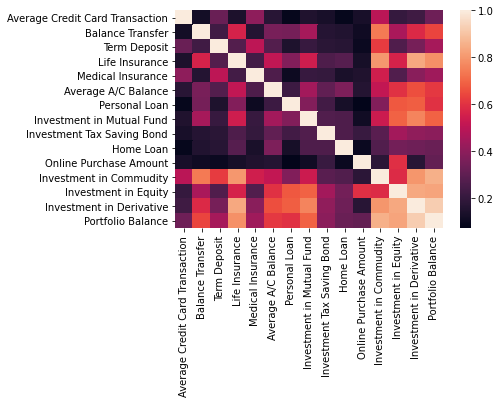

In [ ]:
sns.heatmap(bd.corr())

In [ ]:
X=bd.copy()

In [ ]:
X = scale(X)

In [ ]:
X.shape

(10155, 15)

In [ ]:
pca = PCA(n_components=15)

In [ ]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.components_

array([[ 1.38519523e-01,  2.51914540e-01,  1.88417476e-01,
         3.04607540e-01,  1.82510270e-01,  2.58260897e-01,
         2.24513067e-01,  2.77210354e-01,  1.74420241e-01,
         1.52766829e-01,  1.21072307e-01,  3.40703395e-01,
         3.29225771e-01,  3.65017102e-01,  3.68347115e-01],
       [-4.88608479e-01,  7.44901633e-02, -4.76410887e-01,
         9.36614508e-02, -5.08504340e-01,  5.26391563e-02,
         2.84311540e-01,  1.92269168e-01,  6.19345939e-02,
         5.87040971e-02,  4.00182080e-02, -2.47299192e-01,
         2.27890747e-01,  1.35880508e-01,  1.96728973e-02],
       [ 9.92402137e-02, -3.38650619e-01, -2.40778241e-02,
        -2.51354679e-01,  9.28872328e-02,  7.39089017e-02,
        -7.57792946e-02, -9.24865107e-02,  3.92044037e-01,
         2.29065734e-01,  6.57231934e-01, -2.07369984e-01,
         2.99511084e-01, -1.06139426e-01, -3.49738696e-02],
       [ 1.55828400e-01,  1.29429526e-01, -4.69731932e-02,
        -7.39316085e-02,  1.32066879e-02, -3.48621577

In [ ]:
pca.components_.shape

(15, 15)

In [ ]:
#### The percentage of orginal information present in the each of the new columns

var= pca.explained_variance_ratio_

print(var)

[4.57760905e-01 1.06815789e-01 8.37682574e-02 6.76590833e-02
 5.51515528e-02 4.60704467e-02 4.47954686e-02 4.13678442e-02
 3.33620268e-02 3.13826959e-02 2.73470603e-02 4.51886955e-03
 3.16261746e-10 2.47789450e-10 1.75773727e-10]


In [ ]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

[ 45.78  56.46  64.84  71.61  77.13  81.74  86.22  90.36  93.7   96.84
  99.57 100.02 100.02 100.02 100.02]


In [ ]:
pca = PCA(n_components=11)

In [ ]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.components_.shape

(11, 15)

In [ ]:
X1=pd.DataFrame(pca.transform(X))

In [ ]:
bd

,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,148.44,142.95,0.00,81.96,0.00,29.99,0.00,61.95,19.99,0.00,0.00,74.67,18.66,32.32,89.43
1,0.00,74.98,0.00,25.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.19,0.00,4.33,22.78
2,0.00,166.44,20.99,291.37,11.48,166.94,0.00,15.99,0.00,3.49,0.00,98.06,31.07,80.96,171.78
3,0.00,0.00,0.00,20.49,0.00,39.46,0.00,45.44,0.00,0.00,0.00,4.10,14.15,17.57,-41.70
4,73.45,57.96,0.00,177.42,41.95,39.47,10.97,212.84,0.00,45.91,25.98,70.16,55.86,80.44,235.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,0.00,0.00,0.00,29.97,6.49,0.00,8.99,7.49,4.49,0.00,0.00,7.29,3.50,9.57,10.23
10151,0.00,110.95,0.00,200.41,0.00,2.99,0.00,14.99,0.00,0.00,0.00,62.27,3.00,36.40,102.62
10152,124.93,0.00,54.48,0.00,84.42,0.00,0.00,0.00,0.00,0.00,0.00,52.77,0.00,14.07,76.18
10153,0.00,35.98,0.00,0.00,0.00,0.00,0.00,9.98,0.00,7.98,0.00,7.20,2.99,1.66,4.79


In [ ]:
X1

,0,1,2,3,4,5,6,7,8,9,10
0,0.869774,-0.792852,-0.300362,0.463627,0.016042,0.368796,-2.804879,0.659902,0.076150,0.546220,0.309983
1,-1.763740,0.271868,-0.529384,0.342982,0.391251,-0.243377,-0.136108,0.514181,0.008195,-0.106689,0.244363
2,2.759896,0.575463,-1.617375,-0.904037,2.031229,-0.561042,-0.315313,-0.826448,2.165835,-0.664759,-0.131263
3,-1.682247,0.607132,0.003920,-0.086971,0.092131,0.192318,0.067067,-0.697390,0.119397,0.299323,0.119600
4,3.433527,0.456228,0.402857,-2.512890,0.613241,2.756212,0.126809,0.513503,-2.382016,-0.410804,-0.479994
...,...,...,...,...,...,...,...,...,...,...,...
10150,-1.899811,0.293824,0.006565,0.168493,-0.237207,-0.196357,-0.017735,0.018811,-0.043481,-0.158994,-0.239538
10151,-0.066473,0.426890,-1.451677,0.350205,0.974095,-0.532417,-0.434767,0.607950,0.045247,-0.582694,-0.906420
10152,-0.545130,-2.975703,0.119935,0.679196,-0.676347,0.778288,-0.265276,-0.153630,-0.251452,-0.752468,0.172400
10153,-1.966918,0.371118,-0.019106,-0.272167,0.169842,0.239058,0.150698,0.583076,-0.224180,-0.032177,0.217751


### individual pc loadings

In [ ]:
# pc1

loadings=pca.components_[0]
loadings

array([ 0.09924021, -0.33865062, -0.02407782, -0.25135468,  0.09288723,
        0.0739089 , -0.07577929, -0.09248651,  0.39204404,  0.22906573,
        0.65723193, -0.20736998,  0.29951108, -0.10613943, -0.03497387])

In [ ]:
list(zip(bd.columns,loadings))

[('Average Credit Card Transaction', 0.13851952259964861),
 ('Balance Transfer', 0.25191453950759435),
 ('Term Deposit', 0.18841747578001128),
 ('Life Insurance', 0.30460753958728026),
 ('Medical Insurance', 0.1825102697922209),
 ('Average A/C Balance', 0.2582608968666092),
 ('Personal Loan', 0.22451306738791546),
 ('Investment in Mutual Fund', 0.2772103541326052),
 ('Investment Tax Saving Bond', 0.17442024066219247),
 ('Home Loan', 0.1527668294168411),
 ('Online Purchase Amount', 0.12107230662770072),
 ('Investment in Commudity', 0.34070339483996825),
 ('Investment in Equity', 0.3292257708491982),
 ('Investment in Derivative', 0.36501710199575893),
 ('Portfolio Balance', 0.3683471146126874)]

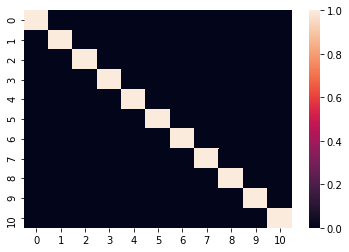

In [ ]:
sns.heatmap(X1.corr())